## Working on Rental Housing Price data

### About Dataset
This dataset provides comprehensive information about rental house prices across various locations in India. It includes details such as house type, size, location, city, latitude, longitude, price, currency, number of bathrooms, number of balconies, negotiability of price, price per square foot, verification date, description of the property, security deposit, and status of furnishing (furnished, unfurnished, semi-furnished).

> Note: This is Recently scraped data of April 2024.

### Dataset Glossary (Column-Wise)

| Column                | Meaning                                                                                   |
|-----------------------|-------------------------------------------------------------------------------------------|
| House Type            | Type of house (e.g., apartment, villa, duplex).                                           |
| House Size            | Size of the house in square feet or square meters.                                        |
| Location              | Specific area or neighborhood where the property is located.                              |
| City                  | City in India where the property is situated.                                             |
| Latitude              | Geographic latitude coordinates of the property location.                                 |
| Longitude             | Geographic longitude coordinates of the property location.                                |
| Price                 | Rental price of the house.                                                                |
| Currency              | Currency in which the price is denoted (e.g., INR - Indian Rupees).                       |
| Number of Bathrooms   | Total number of bathrooms in the house.                                                   |
| Number of Balconies   | Total number of balconies in the house.                                                   |
| Negotiability         | Indicates whether the price is negotiable (Yes/No).                                       |
| Price per Square Foot | Price of the house per square foot.                                                       |
| Verification Date     | Date when the rental information was verified.                                            |
| Description           | Additional description or details about the property.                                     |
| Security Deposit      | Amount of security deposit required for renting the property.                             |
| Status                | Indicates the furnishing status of the property (furnished, unfurnished, semi-furnished). |


Source: https://www.kaggle.com/datasets/bhavyadhingra00020/india-rental-house-price



In [1]:
# Built-in imports
import os
import sys

# Module imports
import pandas as pd
import plotly.express as px

# Setup project environment

PROJECT_DIR = os.path.dirname(os.getcwd())

sys.path.append(PROJECT_DIR)

# Project Imports

from src.utils import WORKING_DIR, PROCESSED_DATA_DIR, get_raw_training_data_path

In [2]:
df = pd.read_csv(get_raw_training_data_path())
df.head()

,house_type,house_size,location,city,latitude,longitude,price,currency,numBathrooms,numBalconies,isNegotiable,priceSqFt,verificationDate,description,SecurityDeposit,Status
0,2 BHK Apartment,"1,180 sq ft",Ulwe,Mumbai,18.971046,73.017723,19000,INR,2.0,NaN,NaN,NaN,Posted 2 years ago,It has area of 1180 sqft and is available at a...,No Deposit,Furnished
1,2 BHK Apartment,"1,120 sq ft",Ulwe,Mumbai,18.966377,73.012802,12500,INR,2.0,NaN,NaN,NaN,Posted 2 years ago,Well designed 2 bhk multistorey apartment is a...,No Deposit,Unfurnished
2,2 BHK Apartment,"1,200 sq ft",Panvel,Mumbai,18.965979,73.124649,22000,INR,2.0,NaN,NaN,NaN,Posted a month ago,A spacious 2 bhk multistorey apartment is avai...,No Deposit,Unfurnished
3,2 BHK Apartment,750 sq ft,Kandivali West,Mumbai,19.213598,72.833633,28500,INR,2.0,NaN,NaN,NaN,Posted 3 years ago,It has a built-up area of 750 sqft and is avai...,No Deposit,Unfurnished
4,3 BHK Apartment,"1,400 sq ft",Chembur,Mumbai,19.062933,72.892395,50000,INR,3.0,NaN,NaN,NaN,Posted 3 years ago,The house is semi-furnished. It has power back...,No Deposit,Semi-Furnished


In [3]:
df.columns

Index(['house_type', 'house_size', 'location', 'city', 'latitude', 'longitude',
       'price', 'currency', 'numBathrooms', 'numBalconies', 'isNegotiable',
       'priceSqFt', 'verificationDate', 'description', 'SecurityDeposit',
       'Status'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   house_type        5000 non-null   object 
 1   house_size        5000 non-null   object 
 2   location          5000 non-null   object 
 3   city              5000 non-null   object 
 4   latitude          5000 non-null   float64
 5   longitude         5000 non-null   float64
 6   price             5000 non-null   int64  
 7   currency          5000 non-null   object 
 8   numBathrooms      4986 non-null   float64
 9   numBalconies      733 non-null    float64
 10  isNegotiable      571 non-null    object 
 11  priceSqFt         0 non-null      float64
 12  verificationDate  5000 non-null   object 
 13  description       4922 non-null   object 
 14  SecurityDeposit   5000 non-null   object 
 15  Status            5000 non-null   object 
dtypes: float64(5), int64(1), object(10)
memory

#### OBSERVATION: 

As observed in above records, house_size can be formatted to `int` type for better parsing.

In [5]:
df["house_size"] = df["house_size"].astype("str").str.replace("[,| sq ft]+", "", regex=True).astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   house_type        5000 non-null   object 
 1   house_size        5000 non-null   int64  
 2   location          5000 non-null   object 
 3   city              5000 non-null   object 
 4   latitude          5000 non-null   float64
 5   longitude         5000 non-null   float64
 6   price             5000 non-null   int64  
 7   currency          5000 non-null   object 
 8   numBathrooms      4986 non-null   float64
 9   numBalconies      733 non-null    float64
 10  isNegotiable      571 non-null    object 
 11  priceSqFt         0 non-null      float64
 12  verificationDate  5000 non-null   object 
 13  description       4922 non-null   object 
 14  SecurityDeposit   5000 non-null   object 
 15  Status            5000 non-null   object 
dtypes: float64(5), int64(2), object(9)
memory 

### Keeping only most useful columns to process further

In [6]:
processed_df = df[['house_type', "house_size", "location", "price", "numBalconies", "numBathrooms", "SecurityDeposit", "Status"]]
processed_df.head()

,house_type,house_size,location,price,numBalconies,numBathrooms,SecurityDeposit,Status
0,2 BHK Apartment,1180,Ulwe,19000,NaN,2.0,No Deposit,Furnished
1,2 BHK Apartment,1120,Ulwe,12500,NaN,2.0,No Deposit,Unfurnished
2,2 BHK Apartment,1200,Panvel,22000,NaN,2.0,No Deposit,Unfurnished
3,2 BHK Apartment,750,Kandivali West,28500,NaN,2.0,No Deposit,Unfurnished
4,3 BHK Apartment,1400,Chembur,50000,NaN,3.0,No Deposit,Semi-Furnished


In [7]:
df[df["numBathrooms"].isnull()][['house_type', 'house_size', 'location', 'price', 'numBathrooms', 'description']]

,house_type,house_size,location,price,numBathrooms,description
997,1 BHK Apartment,585,Boisar,5000,NaN,Itâs a 1 bhk multistorey apartment situated ...
1255,3 BHK Apartment,1380,Bhandup West,57000,NaN,A 3 bhk property is available for rental in Ma...
1675,2 BHK Apartment,980,Virar,11000,NaN,A 2 bhk property is available for rent in Vira...
1883,1 BHK Apartment,345,Andheri West,6000,NaN,Itâs a 1 bhk multistorey apartment situated ...
1901,1 BHK Apartment,1200,Kalyan West,17000,NaN,A 1 bhk property is available for rental in Ko...
2802,2 BHK Apartment,1010,Kharghar,26000,NaN,A 2 bhk property is available for rental in Sw...
3044,2 BHK Apartment,1200,Bandra West,110000,NaN,2 BHK FULLY FURNISHED FLAT ON RENT VERY GOOD C...
3548,3 BHK Apartment,1550,Lokhandwala,130000,NaN,Available 3 bhk flat at Andheri West\nFamily a...
3559,3 BHK Apartment,1550,Lokhandwala,130000,NaN,Available 3 bhk flat at Andheri West\nFamily a...
3709,1 BHK Apartment,610,Virar,6500,NaN,A spacious 1 bhk multistorey apartment is avai...


### Observation:

As per records above, it's heavily unlikely that bathrooms are not available in these apartments and hence filling with N/A would'nt make sense.

In [8]:
print(*processed_df["house_type"].unique(), sep="\n")

2 BHK Apartment 
3 BHK Apartment 
1 RK Studio Apartment 
1 BHK Apartment 
4 BHK Apartment 
1 BHK Independent Floor 
3 BHK Villa 
3 BHK Independent House 
4 BHK Independent House 
4 BHK Villa 
6 BHK Apartment 
2 BHK Independent House 
5 BHK Apartment 
1 BHK Villa 
4 BHK Independent Floor 
6 BHK Villa 
5 BHK Villa 
3 BHK Independent Floor 
2 BHK Independent Floor 
6 BHK penthouse 
1 BHK Independent House 


### Data Transformation

Split house type into meaningful values of columns for better analysis:

1. Map house category to the Apartment/villa/studio
2. Keep a new column to keep track of number of bedrooms

In [9]:
from collections import OrderedDict

house_type_map = OrderedDict({
    "studio apartment": "studio",
    "villa": "villa", 
    "apartment": "apartment", 
    "penthouse": "apartment",
    "independent house": "villa", 
    "independent floor": "apartment"
})

intermediate_records = []
for record in processed_df["house_type"]:
    for house_type, category in house_type_map.items():
        if house_type in record.lower():
            intermediate_records.append(category)
            break
            

In [10]:
len(intermediate_records)

5000

In [11]:
len(processed_df["house_type"])

5000

In [12]:
# validating replacement
# print(*(i for i in zip(processed_df["house_type"].to_list(), intermediate_records)), sep="\n")

In [13]:
processed_df['category'] = intermediate_records
processed_df.head()

C:\Users\gahan\AppData\Local\Temp\ipykernel_8420\2314682587.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_df['category'] = intermediate_records


,house_type,house_size,location,price,numBalconies,numBathrooms,SecurityDeposit,Status,category
0,2 BHK Apartment,1180,Ulwe,19000,NaN,2.0,No Deposit,Furnished,apartment
1,2 BHK Apartment,1120,Ulwe,12500,NaN,2.0,No Deposit,Unfurnished,apartment
2,2 BHK Apartment,1200,Panvel,22000,NaN,2.0,No Deposit,Unfurnished,apartment
3,2 BHK Apartment,750,Kandivali West,28500,NaN,2.0,No Deposit,Unfurnished,apartment
4,3 BHK Apartment,1400,Chembur,50000,NaN,3.0,No Deposit,Semi-Furnished,apartment


In [14]:
# processed_df[processed_df["house_type"]=="1 RK Studio Apartment "]

In [15]:
processed_df["numBedrooms"] = [int(record.split(" ", 1)[0]) for record in processed_df["house_type"]]

C:\Users\gahan\AppData\Local\Temp\ipykernel_8420\2318267807.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_df["numBedrooms"] = [int(record.split(" ", 1)[0]) for record in processed_df["house_type"]]


In [16]:
processed_df[processed_df["numBedrooms"]==1]

,house_type,house_size,location,price,numBalconies,numBathrooms,SecurityDeposit,Status,category,numBedrooms
5,1 RK Studio Apartment,450,Badlapur East,3000,NaN,1.0,No Deposit,Unfurnished,studio,1
6,1 BHK Apartment,700,Dombivali,9500,NaN,2.0,No Deposit,Unfurnished,apartment,1
7,1 BHK Apartment,600,Bandra West,55000,NaN,2.0,No Deposit,Furnished,apartment,1
8,1 BHK Apartment,600,Andheri East,50000,NaN,2.0,No Deposit,Furnished,apartment,1
11,1 BHK Apartment,750,Colaba,100000,NaN,2.0,No Deposit,Furnished,apartment,1
...,...,...,...,...,...,...,...,...,...,...
4988,1 BHK Apartment,474,Malad East,38000,NaN,2.0,"1,00,000",Furnished,apartment,1
4989,1 BHK Apartment,474,Malad East,40000,NaN,2.0,"1,00,000",Furnished,apartment,1
4990,1 BHK Apartment,553,Kandivali West,30000,NaN,2.0,"1,00,000",Semi-Furnished,apartment,1
4992,1 BHK Apartment,650,Borivali East,32000,NaN,2.0,"1,00,000",Unfurnished,apartment,1


### Map ratio of price per bedroom

In [17]:
processed_df.eval("ratio_per_room = price/numBedrooms", inplace=True)
processed_df.head()

C:\Users\gahan\AppData\Local\Temp\ipykernel_8420\1233540222.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_df.eval("ratio_per_room = price/numBedrooms", inplace=True)


,house_type,house_size,location,price,numBalconies,numBathrooms,SecurityDeposit,Status,category,numBedrooms,ratio_per_room
0,2 BHK Apartment,1180,Ulwe,19000,NaN,2.0,No Deposit,Furnished,apartment,2,9500.000000
1,2 BHK Apartment,1120,Ulwe,12500,NaN,2.0,No Deposit,Unfurnished,apartment,2,6250.000000
2,2 BHK Apartment,1200,Panvel,22000,NaN,2.0,No Deposit,Unfurnished,apartment,2,11000.000000
3,2 BHK Apartment,750,Kandivali West,28500,NaN,2.0,No Deposit,Unfurnished,apartment,2,14250.000000
4,3 BHK Apartment,1400,Chembur,50000,NaN,3.0,No Deposit,Semi-Furnished,apartment,3,16666.666667


### Map price per sq feet

In [18]:
processed_df.eval("PricePerSqft = price/house_size", inplace=True)
processed_df.head()

C:\Users\gahan\AppData\Local\Temp\ipykernel_8420\2556400597.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_df.eval("PricePerSqft = price/house_size", inplace=True)


,house_type,house_size,location,price,numBalconies,numBathrooms,SecurityDeposit,Status,category,numBedrooms,ratio_per_room,PricePerSqft
0,2 BHK Apartment,1180,Ulwe,19000,NaN,2.0,No Deposit,Furnished,apartment,2,9500.000000,16.101695
1,2 BHK Apartment,1120,Ulwe,12500,NaN,2.0,No Deposit,Unfurnished,apartment,2,6250.000000,11.160714
2,2 BHK Apartment,1200,Panvel,22000,NaN,2.0,No Deposit,Unfurnished,apartment,2,11000.000000,18.333333
3,2 BHK Apartment,750,Kandivali West,28500,NaN,2.0,No Deposit,Unfurnished,apartment,2,14250.000000,38.000000
4,3 BHK Apartment,1400,Chembur,50000,NaN,3.0,No Deposit,Semi-Furnished,apartment,3,16666.666667,35.714286


In [19]:
processed_df.describe()

,house_size,price,numBalconies,numBathrooms,numBedrooms,ratio_per_room,PricePerSqft
count,5000.000000,5.000000e+03,733.000000,4986.000000,5000.000000,5000.000000,5000.000000
mean,1003.445200,6.239421e+04,2.064120,2.033895,1.906600,29303.198533,55.816196
std,592.373077,8.874473e+04,1.095187,0.800861,0.843338,24514.420003,39.796973
min,150.000000,2.800000e+03,1.000000,1.000000,1.000000,2666.666667,6.363636
25%,650.000000,2.100000e+04,1.000000,2.000000,1.000000,14000.000000,26.452840
50%,900.000000,4.000000e+04,2.000000,2.000000,2.000000,23000.000000,47.649730
75%,1200.000000,7.000000e+04,3.000000,2.000000,2.000000,35000.000000,71.428571
max,8326.000000,1.200000e+06,6.000000,7.000000,6.000000,300000.000000,380.000000


### Create function for repeatative box plot for dashboard analysis, and move to the utilities

In [20]:
# def get_box_plot(input_df, plot_parameter="price", **filter_kwargs):
#     for key, value in filter_kwargs.items():
#         if key in input_df.columns:
#             input_df = input_df[input_df[key] == value]
#     fig = px.box(input_df, y=plot_parameter)
#     return fig

from src.utils import get_box_plot

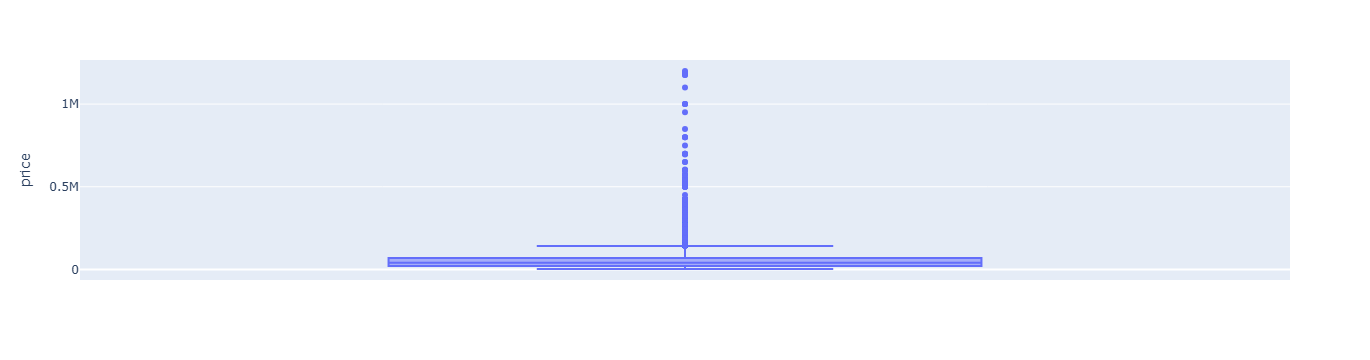

In [39]:
get_box_plot(processed_df, plot_parameter="price").show()

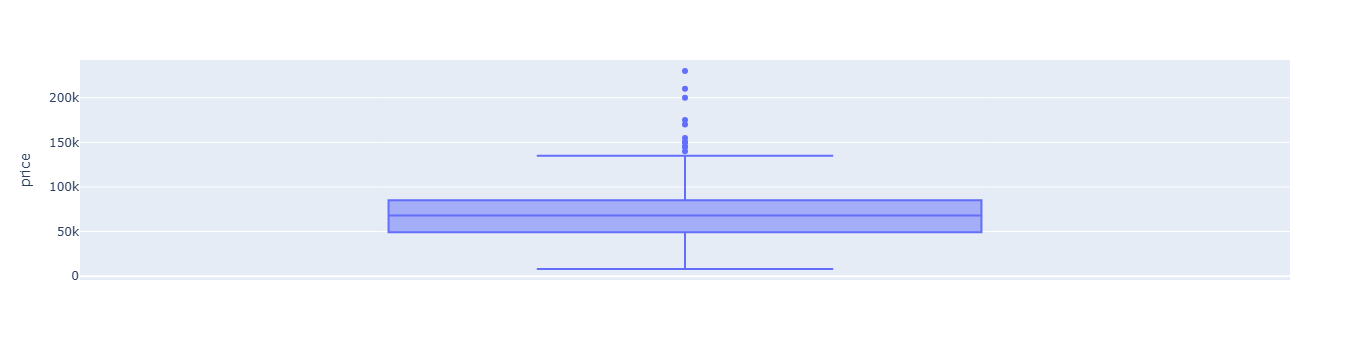

In [40]:
get_box_plot(processed_df, plot_parameter="price", numBedrooms=3, Status="Unfurnished").show()

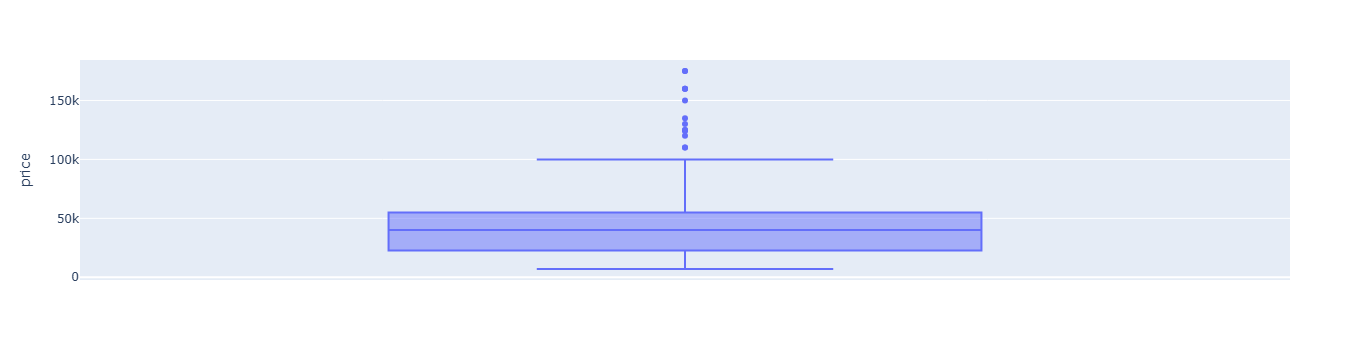

In [41]:
get_box_plot(processed_df, plot_parameter="price", numBedrooms=2, Status="Unfurnished").show()

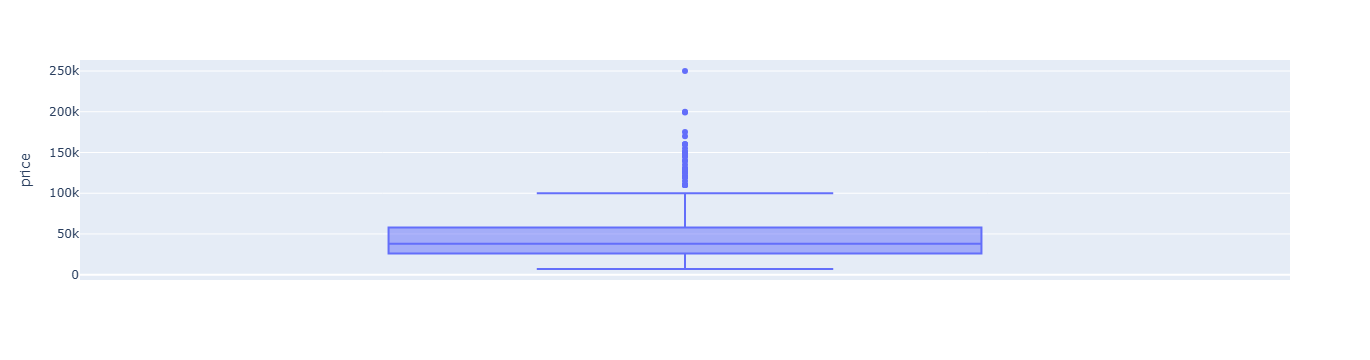

In [42]:
get_box_plot(processed_df, plot_parameter="price", numBedrooms=2, Status="Semi-Furnished").show()

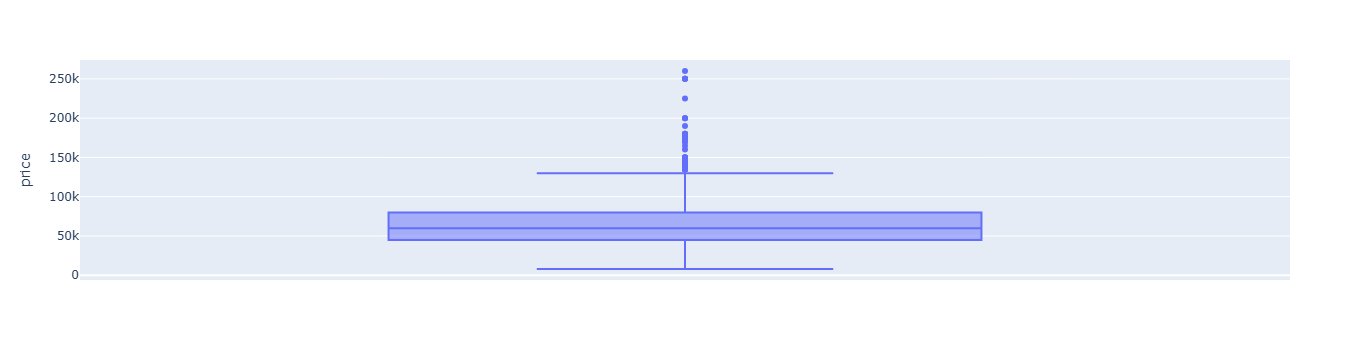

In [43]:
get_box_plot(processed_df, plot_parameter="price", numBedrooms=2, Status="Furnished").show()

In [44]:
processed_df.location.unique()

array(['Ulwe', 'Panvel', 'Kandivali West', 'Chembur', 'Badlapur East',
       'Dombivali', 'Bandra West', 'Andheri East', 'Bhayandar East',
       'Goregaon West', 'Colaba', 'Kalamboli', 'Palghar', 'Nerul',
       'Kandivali East', 'Sion', 'Andheri West', 'Juhu', 'Vasai',
       'Thakurli', 'Powai', 'Jogeshwari East', 'Mira Road East',
       'Thane West', 'Parel', 'Prabhadevi', 'Ghatkopar East',
       'Kalyan West', 'Dadar East', 'vile parle west', 'Bhandup West',
       'Borivali East', 'Mahalaxmi', 'Kanjurmarg', 'Seawoods',
       'Dombivali East', 'Titwala', 'Karanjade', 'Girgaon',
       'Malabar Hill', 'Dadar West', 'Goregaon East', 'Mahim', 'Sanpada',
       'Mulund West', 'Tardeo', 'Malad East', 'Borivali West',
       'Malad West', 'Kharghar', 'Jogeshwari West', 'Kamothe',
       'Bandra East', 'Worli', 'Ville Parle East', 'Mulund East',
       'Vikhroli', 'Ghatkopar West', 'Dombivli (West)', 'Cumballa Hill',
       'Khar', 'Vevoor', 'Kanjurmarg East', 'Lower Parel', 'Marine 

## Use-case -- Looking for 2-BHK apartment in Bandra East, what would be the pricing?

- Finding ____<price_range>____ for location __<e.g.>___ for __<category>____________ with __________<numBedrooms>_______ bedrooms.
- Most pricing are in quartile range from Q1 to Q3

In [45]:
processed_df[processed_df['numBedrooms']==2].groupby('location')[['price']].describe()

price                                                   \
                count           mean           std       min       25%   
location                                                                 
Agripada          1.0  100000.000000           NaN  100000.0  100000.0   
Airoli           19.0   31552.631579   5673.757174   19000.0   28750.0   
Ambernath East    5.0   10600.000000   3209.361307    7000.0    8000.0   
Ambernath West    2.0   13500.000000   2121.320344   12000.0   12750.0   
Andheri East     71.0   58671.549296  13482.875345   22000.0   50000.0   
...               ...            ...           ...       ...       ...   
Wadala            9.0   82233.333333  15045.431200   62000.0   75000.0   
Worli            10.0  121000.000000  28751.811537   80000.0  105000.0   
Yari Road         3.0   68333.333333   7637.626158   60000.0   65000.0   
juhu tara         2.0  220000.000000  56568.542495  180000.0  200000.0   
vile parle west   2.0   85000.000000  14142.135624   75000.0   80000.0   

                                               
                      50%       75%       max  
location                                       
Agripada         100000.0  100000.0  100000.0  
Airoli            30000.0   37000.0   40000.0  
Ambernath East    11000.0   12000.0   15000.0  
Ambernath West    13500.0   14250.0   15000.0  
Andheri East      57000.0   69500.0   90000.0  
...                   ...       ...       ...  
Wadala            85000.0   90000.0  110000.0  
Worli            110000.0  150000.0  160000.0  
Yari Road         70000.0   72500.0   75000.0  
juhu tara        220000.0  240000.0  260000.0  
vile parle west   85000.0   90000.0   95000.0  

[135 rows x 8 columns]

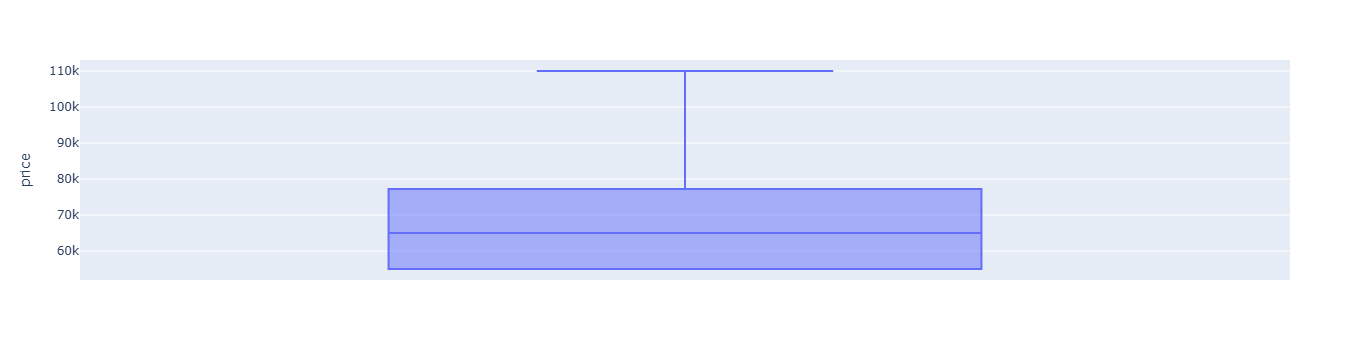

In [46]:
get_box_plot(processed_df, plot_parameter="price", numBedrooms=2, category="apartment", location="Bandra East").show()

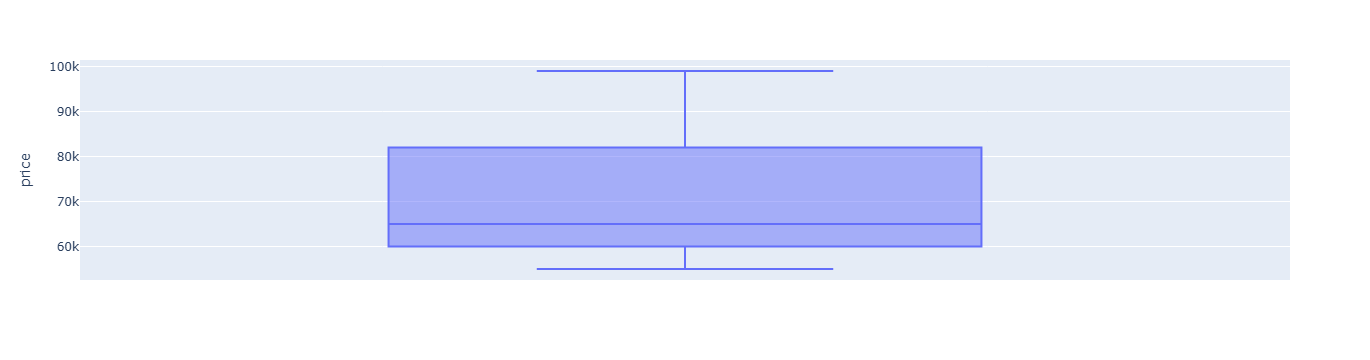

In [47]:
get_box_plot(processed_df, plot_parameter="price", numBedrooms=2, category="apartment", location="Bandra East", Status="Furnished").show()

In [48]:
processed_df[processed_df["location"]=="Bandra East"].groupby("Status").count()

,house_type,house_size,location,price,numBalconies,numBathrooms,SecurityDeposit,category,numBedrooms,ratio_per_room,PricePerSqft
Status,,,,,,,,,,,
Furnished,6,6,6,6,0,6,6,6,6,6,6
Semi-Furnished,6,6,6,6,1,6,6,6,6,6,6
Unfurnished,2,2,2,2,1,2,2,2,2,2,2


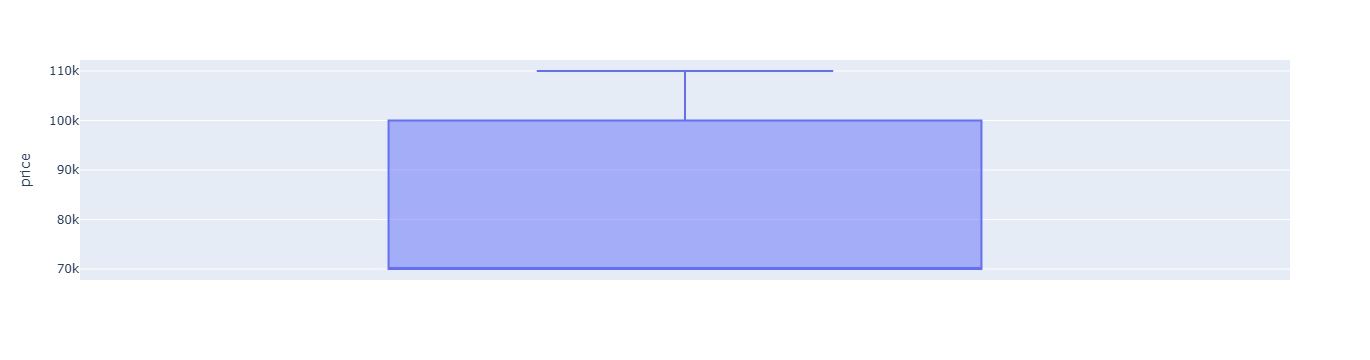

In [49]:
get_box_plot(processed_df, plot_parameter="price", numBedrooms=2, category="apartment", location="Bandra East", Status="Semi-Furnished").show()

## Top 10 costliest/premium area

- No of have Balconies  --- Higher the better
- No of have Bedrooms --- Higher the better
- Cateogy of -- villa or penthouse or independent floor
- Furnished/Semi-Furnished

In [50]:
processed_df[processed_df["location"]=="Bandra East"].numBedrooms.median()

np.float64(2.0)

In [51]:
processed_df[processed_df["location"]=="Bandra East"].numBedrooms.max()

np.int64(4)

In [52]:
processed_df.groupby("location").count().sort_values(by=['house_type'])

,house_type,house_size,price,numBalconies,numBathrooms,SecurityDeposit,Status,category,numBedrooms,ratio_per_room,PricePerSqft
location,,,,,,,,,,,
Aarya Chanakya Nagar,1,1,1,0,1,1,1,1,1,1,1
Akurli Road,1,1,1,0,1,1,1,1,1,1,1
Akurli Road Number 1,1,1,1,0,1,1,1,1,1,1,1
Babhai,1,1,1,0,1,1,1,1,1,1,1
Antarli,1,1,1,0,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
Ghansoli,196,196,196,149,196,196,196,196,196,196,196
Kharghar,255,255,255,57,254,255,255,255,255,255,255
Andheri East,284,284,284,8,284,284,284,284,284,284,284


In [53]:
median_distribution_bedrooms = processed_df.groupby("location")["numBedrooms"].median().sort_values(ascending=False)
median_distribution_bedrooms.head(10)

location
Churchgate           4.0
Marine Drive         4.0
Walkeshwar           4.0
Jacob Circle         4.0
Gamdevi              3.5
Gulmohar Road        3.0
Lower Parel          3.0
matunga east         3.0
Worli                3.0
vakola santacuz e    3.0
Name: numBedrooms, dtype: float64

In [54]:
mean_distribution_bedrooms = processed_df.groupby("location")["numBedrooms"].median().sort_values(ascending=False)
mean_distribution_bedrooms.head(10)

location
Churchgate           4.0
Marine Drive         4.0
Walkeshwar           4.0
Jacob Circle         4.0
Gamdevi              3.5
Gulmohar Road        3.0
Lower Parel          3.0
matunga east         3.0
Worli                3.0
vakola santacuz e    3.0
Name: numBedrooms, dtype: float64

In [55]:
median_distribution_bedrooms = processed_df.groupby("location")["ratio_per_room"].median().sort_values(ascending=False)
median_distribution_bedrooms.head(10)

location
Jacob Circle    237500.000000
Marine Drive    131250.000000
Walkeshwar      131250.000000
juhu tara       125000.000000
Churchgate      125000.000000
Breach Candy    120000.000000
Agripada        114166.666667
Kapurbawadi     100000.000000
Lower Parel     100000.000000
Carter Road     100000.000000
Name: ratio_per_room, dtype: float64

In [56]:
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   house_type       5000 non-null   object 
 1   house_size       5000 non-null   int64  
 2   location         5000 non-null   object 
 3   price            5000 non-null   int64  
 4   numBalconies     733 non-null    float64
 5   numBathrooms     4986 non-null   float64
 6   SecurityDeposit  5000 non-null   object 
 7   Status           5000 non-null   object 
 8   category         5000 non-null   object 
 9   numBedrooms      5000 non-null   int64  
 10  ratio_per_room   5000 non-null   float64
 11  PricePerSqft     5000 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 468.9+ KB


In [57]:
processed_df.groupby("location")[["price", "numBedrooms", "ratio_per_room"]].mean().sort_values(by="ratio_per_room", ascending=False)

,price,numBedrooms,ratio_per_room
location,,,
Jacob Circle,950000.000000,4.000000,237500.000000
Marine Drive,525000.000000,4.000000,131250.000000
Walkeshwar,525000.000000,4.000000,131250.000000
Breach Candy,120000.000000,1.000000,120000.000000
juhu tara,271666.666667,2.333333,115000.000000
...,...,...,...
Hendre Pada,4500.000000,1.000000,4500.000000
Badlapur East,5747.058824,1.294118,4305.882353
Koproli,8500.000000,2.000000,4250.000000


In [58]:
processed_df.groupby("location")[["price", "numBedrooms", "ratio_per_room"]].median().sort_values(by="ratio_per_room", ascending=False)

,price,numBedrooms,ratio_per_room
location,,,
Jacob Circle,950000.0,4.0,237500.0
Marine Drive,525000.0,4.0,131250.0
Walkeshwar,525000.0,4.0,131250.0
juhu tara,260000.0,2.0,125000.0
Churchgate,500000.0,4.0,125000.0
...,...,...,...
Hendre Pada,4500.0,1.0,4500.0
Koproli,8500.0,2.0,4250.0
Badlapur East,5000.0,1.0,4000.0


In [59]:
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   house_type       5000 non-null   object 
 1   house_size       5000 non-null   int64  
 2   location         5000 non-null   object 
 3   price            5000 non-null   int64  
 4   numBalconies     733 non-null    float64
 5   numBathrooms     4986 non-null   float64
 6   SecurityDeposit  5000 non-null   object 
 7   Status           5000 non-null   object 
 8   category         5000 non-null   object 
 9   numBedrooms      5000 non-null   int64  
 10  ratio_per_room   5000 non-null   float64
 11  PricePerSqft     5000 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 468.9+ KB


In [62]:
processed_df.to_csv(os.path.join(PROCESSED_DATA_DIR, "refined_lvl1.csv"))